<div style="text-align: right"> <b>데이터분석과기계학습 프로젝트(연이삭)</b></div>

---

주피터 노트북 파일 주소<br>
https://github.com/IscYeon/electricVehecleProject/blob/main/groupProj.ipynb
<br><br>

Below webpage is the general purpose open data portal for the State of Washington.<br>
We downloaded and used csv files from this portal for our analysis practice.<br>
아래 웹페이지는 워싱턴 주 공공오픈데이터포털입니다. 저희는 여기에서 csv 파일을 받아 분석 실습을 하였습니다.
<br>
https://data.wa.gov
<br><br><br><br>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
electric = pd.read_csv('/Users/isc-yeon/Documents/projectData/Electric_Vehicle_Population_Data.csv')

electric.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,POINT (-81.558651 30.777128),NaN
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC


In [ ]:
electric.loc[:, 'Electric Vehicle Type'].isnull().sum()

In [ ]:
electric.loc[:, 'Electric Range'].isnull().sum()

In [ ]:
electric.loc[:, 'Electric Range'].value_counts()

In [ ]:
electric.loc[:, 'Electric Range'].plot.hist(bins=40)

In [ ]:
electric.loc[:, 'Electric Range'].describe()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
electric.loc[:, 'Electric Range'].hist(ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
electric.loc[:, 'Electric Range'].hist(ax=ax, bins=50)

In [ ]:
electric[electric['Electric Range'] == 0].head()

In [ ]:
electric[electric['Electric Range'] == 0].index

In [ ]:
is_zero = electric[electric['Electric Range'] == 0].index

In [ ]:
electric.loc[:, 'Electric Range'].nunique()

In [ ]:
electric.info()

In [ ]:
electric = electric.drop(is_zero)

In [ ]:
electric.info()

In [ ]:
electric.loc[:, 'Electric Range'].nunique()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
electric.loc[:, 'Electric Range'].hist(ax=ax, bins=50)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=electric,
             x=electric.loc[:, 'Electric Range'],
             hue=electric.loc[:, 'Electric Vehicle Type'],
             ax=ax,
             binwidth=10
            )

In [ ]:
electric.corr()['Electric Range'].sort_values()

In [ ]:
electric = electric.dropna()
electric.isna().sum()

In [ ]:
import statsmodels.api as sm

df = electric.iloc[:,[5,12]]
y = electric.iloc[:,[10]]

In [ ]:
model = sm.OLS(y, df)
result = model.fit()
result.summary()

In [ ]:
electric.loc[:, 'ZIP Code'].value_counts()

In [3]:
electric = pd.read_csv('/Users/isc-yeon/Documents/projectData/Electric_Vehicle_Population_Data.csv')

electric.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,POINT (-81.558651 30.777128),NaN
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC


In [3]:
# 다중 선형 회귀
# 가치투자 - 실질적인 시장의 과거 반증을 봄으로써 특정 회사의 가치가 상승할 것으로 예측??? 

<AxesSubplot:>

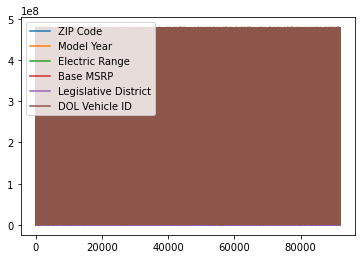

In [4]:
electric.plot()

In [5]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91933 entries, 0 to 91932
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         91933 non-null  object 
 1   County                                             91925 non-null  object 
 2   City                                               91933 non-null  object 
 3   State                                              91933 non-null  object 
 4   ZIP Code                                           91933 non-null  int64  
 5   Model Year                                         91933 non-null  int64  
 6   Make                                               91933 non-null  object 
 7   Model                                              91916 non-null  object 
 8   Electric Vehicle Type                              91933 non-null  object 
 9   Clean 

In [6]:
electric.dropna(inplace=True)

In [7]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90111 entries, 0 to 91932
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         90111 non-null  object 
 1   County                                             90111 non-null  object 
 2   City                                               90111 non-null  object 
 3   State                                              90111 non-null  object 
 4   ZIP Code                                           90111 non-null  int64  
 5   Model Year                                         90111 non-null  int64  
 6   Make                                               90111 non-null  object 
 7   Model                                              90111 non-null  object 
 8   Electric Vehicle Type                              90111 non-null  object 
 9   Clean 

In [8]:
electric.shape

(90111, 16)

In [9]:
import statsmodels.formula.api as smf

In [10]:
model = smf.ols(formula='electric[\'Electric Range\'] ~ electric[\'Model Year\'] + electric[\'DOL Vehicle ID\'] + electric[\'City\']', data=electric).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     electric['Electric Range']   R-squared:                       0.029
Model:                                    OLS   Adj. R-squared:                  0.024
Method:                         Least Squares   F-statistic:                     6.264
Date:                        Thu, 10 Nov 2022   Prob (F-statistic):          1.22e-310
Time:                                12:11:09   Log-Likelihood:            -5.4513e+05
No. Observations:                       90111   AIC:                         1.091e+06
Df Residuals:                           89689   BIC:                         1.095e+06
Df Model:                                 421                                         
Covariance Type:                    nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     6795.6474    258.702     26.268      0.000    6288.594    7302.701
electric['City'][T.ACME]                        12.2332     47.119      0.260      0.795     -80.119     104.586
electric['City'][T.ADDY]                       -45.5118     73.429     -0.620      0.535    -189.433      98.409
electric['City'][T.AIRWAY HEIGHTS]               5.5992     27.686      0.202      0.840     -48.664      59.863
electric['City'][T.ALGONA]                     -38.9750     26.974     -1.445      0.148     -91.845      13.895
electric['City'][T.ALLYN]                       24.4838     19.068      1.284      0.199     -12.889      61.857
electric['City'][T.ALMIRA]                     142.9873    103.334      1.384      0.166     -59.547     345.522
electric['City'][T.AMANDA PARK]                 -1.8113     60.249     -0.030      0.976    -119.899     116.276
electric['City'][T.AMBOY]                      -13.1320     29.341     -0.448      0.654     -70.640      44.376
electric['City'][T.ANACORTES]                   23.5786     11.682      2.018      0.044       0.683      46.474
electric['City'][T.ANDERSON ISLAND]             22.3007     22.300      1.000      0.317     -21.407      66.009
electric['City'][T.ARIEL]                      -36.8635     43.218     -0.853      0.394    -121.570      47.843
electric['City'][T.ARLINGTON]                   23.9088     12.037      1.986      0.047       0.317      47.500
electric['City'][T.ASHFORD]                      4.5267     43.219      0.105      0.917     -80.183      89.236
electric['City'][T.ASOTIN]                      85.6039     40.201      2.129      0.033       6.811     164.397
electric['City'][T.AUBURN]                      10.2969     10.806      0.953      0.341     -10.882      31.476
electric['City'][T.BAINBRIDGE IS]               70.9306     73.429      0.966      0.334     -72.991     214.852
electric['City'][T.BAINBRIDGE ISLAND]           22.7444     10.762      2.113      0.035       1.652      43.837
electric['City'][T.BARING]                      22.6663     73.430      0.309      0.758    -121.256     166.588
electric['City'][T.BATTLE GROUND]               16.1229     11.811      1.365      0.172      -7.027      39.273
electric['City'][T.BAY CENTER]                 -60.3460    103.339     -0.584      0.559    -262.888     142.197
electric['City'][T.BEAUX ARTS]                  25.9425     21.686      1.196      0.232     -16.562      68.447
electric['City'][T.BEAVER]                     133.7851    103.334      1.295      0.195     -68.748     336.318
electric['City'][T.BELFAIR]                     11.1279  

In [3]:
vehicle = pd.read_csv('/Users/isc-yeon/Documents/projectData/Vehicle_Registration_Transactions_by_Department_of_Licensing.csv',
                      # nrows=10_000,
                      usecols = [3,11],
                      low_memory=False)

vehicle

,Model Year,Electrification Level
0,2019,Strong HEV (Hybrid Electric Vehicle)
1,2014,ICE (Internal Combustion Engine)
2,2002,ICE (Internal Combustion Engine)
3,2008,ICE (Internal Combustion Engine)
4,1997,ICE (Internal Combustion Engine)
...,...,...
18284632,2020,ICE (Internal Combustion Engine)
18284633,2005,ICE (Internal Combustion Engine)
18284634,2016,ICE (Internal Combustion Engine)
18284635,2011,ICE (Internal Combustion Engine)


In [3]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18284637 entries, 0 to 18284636
Data columns (total 2 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Model Year             int64 
 1   Electrification Level  object
dtypes: int64(1), object(1)
memory usage: 279.0+ MB


In [4]:
vehicle.loc[:, 'Electrification Level'].value_counts()

ICE (Internal Combustion Engine)                 17400468
Strong HEV (Hybrid Electric Vehicle)               383784
HEV (Hybrid Electric Vehicle) - Level Unknown      245297
BEV (Battery Electric Vehicle)                     177228
PHEV (Plug-in Hybrid Electric Vehicle)              61673
Mild HEV (Hybrid Electric Vehicle)                  16186
Name: Electrification Level, dtype: int64

In [5]:
vehicle.loc[:, 'Electrification Level'].nunique()

6

In [6]:
vehicle.loc[:, 'Electrification Level'].isna().sum()
# 이거 뭐야 na 1갱있는거 ....

1

In [7]:
vehicle.tail(15)

,Model Year,Electrification Level
18284622,2009,ICE (Internal Combustion Engine)
18284623,2009,ICE (Internal Combustion Engine)
18284624,2012,ICE (Internal Combustion Engine)
18284625,2012,ICE (Internal Combustion Engine)
18284626,2012,ICE (Internal Combustion Engine)
18284627,2018,ICE (Internal Combustion Engine)
18284628,2005,ICE (Internal Combustion Engine)
18284629,1999,ICE (Internal Combustion Engine)
18284630,2003,ICE (Internal Combustion Engine)
18284631,2018,ICE (Internal Combustion Engine)


In [4]:
vehicle = vehicle.dropna()

In [5]:
vehicle

,Model Year,Electrification Level
0,2019,Strong HEV (Hybrid Electric Vehicle)
1,2014,ICE (Internal Combustion Engine)
2,2002,ICE (Internal Combustion Engine)
3,2008,ICE (Internal Combustion Engine)
4,1997,ICE (Internal Combustion Engine)
...,...,...
18284632,2020,ICE (Internal Combustion Engine)
18284633,2005,ICE (Internal Combustion Engine)
18284634,2016,ICE (Internal Combustion Engine)
18284635,2011,ICE (Internal Combustion Engine)


In [ ]:
# 시간이 너무 오래걸림 , 뭔가 잘못됬음

# (
#     vehicle
#     .groupby('Model Year')
#     .agg({'Electrification Level':'sum'})
# )

In [6]:
(
    vehicle
    .groupby('Model Year')
    .agg({'Electrification Level':'size'})
)

,Electrification Level
Model Year,
1966,2
1979,10
1980,50
1981,13200
1982,13753
1983,17063
1984,25372
1985,32180
1986,41733


In [13]:
(
    vehicle
    .groupby(['Model Year', 'Electrification Level'])
    .agg({'Electrification Level':'size'})
)

Electrification Level
Model Year Electrification Level                                               
1966       ICE (Internal Combustion Engine)                                   2
1979       ICE (Internal Combustion Engine)                                  10
1980       ICE (Internal Combustion Engine)                                  50
1981       BEV (Battery Electric Vehicle)                                     2
           ICE (Internal Combustion Engine)                               13198
...                                                                         ...
2023       BEV (Battery Electric Vehicle)                                   178
           HEV (Hybrid Electric Vehicle) - Level Unknown                    923
           ICE (Internal Combustion Engine)                                6125
           Mild HEV (Hybrid Electric Vehicle)                               106
           PHEV (Plug-in Hybrid Electric Vehicle)                            72

[154 rows x 1 columns]

In [ ]:
# 2022 

In [21]:
# 지금 데이터 일반차량 + 전기차 통합 데이터이기 때문에
# 내연기관과 전기차량의 수요에 대한 시장의 반증을 볼수 있음(일단 워싱턴한정
# 내가원하는 것은, 앞으로의 Electrification Level 에 따른 추후 시장 demand 예측. 각각 타입에 따라 증감이 있겠지
# 선형 회귀
# Y 수량, X는 기간


In [22]:
# 시계열 (X -> Model Year) 1966 ~ 2023
# 데이터 불균형이 너무 심함...
# 전처리 우선 해보자 : 컬럼 2개 Year(연속형), ICE(연속형), Strong HEV(연속형) .... 
# 컬럼이 2개면 안되지 컬럼이 7개여야함
# 6주차 참고중이엇음... + 7, 10, 11 주차

In [7]:
vehicle.loc[:, 'Transaction Month and Year']

0       January 2022
1       January 2022
2       January 2022
3       January 2022
4       January 2022
            ...     
9995     August 2022
9996     August 2022
9997     August 2022
9998     August 2022
9999     August 2022
Name: Transaction Month and Year, Length: 10000, dtype: object

In [23]:
vehicle.loc[:, 'Model Year'].value_counts()

2015    992366
2017    980076
2016    956686
2018    928261
2014    876754
2013    867633
2019    837377
2007    810184
2006    786531
2008    746063
2005    742767
2012    736262
2004    671601
2011    634565
2020    626761
2003    616635
2010    578001
2002    549461
2001    498349
2009    489059
2021    465477
2000    459349
1999    379875
1998    305863
1997    280142
2022    203424
1996    198053
1995    187408
1994    162642
1993    129291
1992    101596
1991     94661
1990     81706
1989     67690
1988     49740
1986     41733
1987     41561
1985     32180
1984     25372
1983     17063
1982     13753
1981     13200
2023      7404
1980        50
1979        10
1966         2
Name: Model Year, dtype: int64

In [24]:
vehicle.loc[:, 'Model Year'].nunique()

46

2015    992366
2017    980076
2016    956686
2018    928261
2014    876754
2013    867633
2019    837377
2007    810184
2006    786531
2008    746063
2005    742767
2012    736262
2004    671601
2011    634565
2020    626761
2003    616635
2010    578001
2002    549461
2001    498349
2009    489059
2021    465477
2000    459349
1999    379875
1998    305863
1997    280142
2022    203424
1996    198053
1995    187408
1994    162642
1993    129291
1992    101596
1991     94661
1990     81706
1989     67690
1988     49740
1986     41733
1987     41561
1985     32180
1984     25372
1983     17063
1982     13753
1981     13200
2023      7404
1980        50
1979        10
1966         2
Name: Model Year, dtype: int64

In [ ]:
#연습

In [25]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [27]:
# !pip install --upgrade mlxtend

     |████████████████████████████████| 1.3 MB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 8.7 MB 40.2 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [28]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

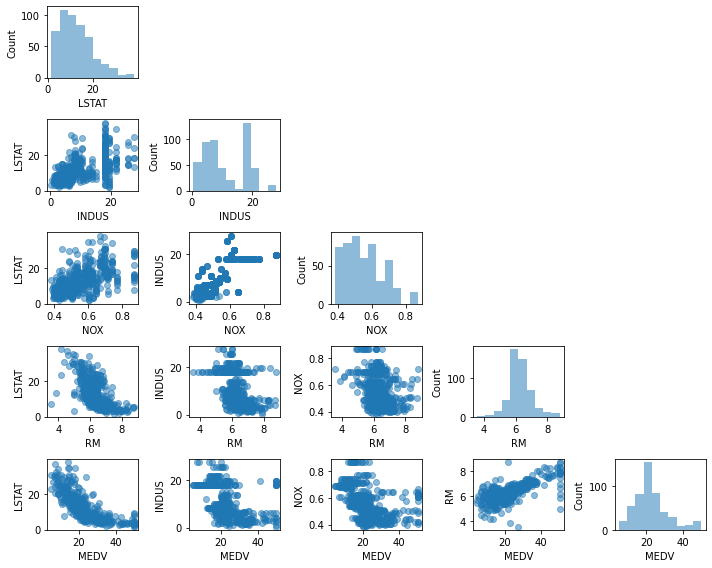

In [31]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10, 8),
                  names=cols, alpha=0.5)

plt.tight_layout()
plt.show()

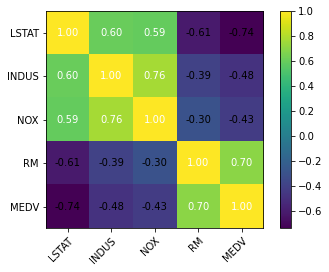

In [32]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)

plt.show()

In [42]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [43]:
X = df[['RM']].values
y = df['MEDV'].values

In [44]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [45]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

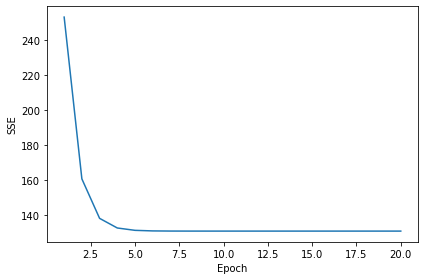

In [46]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

In [58]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='Steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

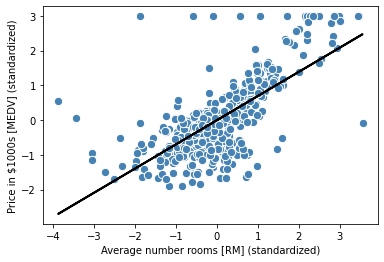

In [59]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

plt.show()

In [60]:
print('기울기: %.3f' % lr.w_[1])
print('절편: %.3f' % lr.w_[0])

기울기: 0.695
절편: -0.000


In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
slr = LinearRegression()
slr.fit(X, y)
y_predict = slr.predict(X)
print('기울기: %.3f' % slr.coef_[0])
print('절편: %.3f' % slr.intercept_)

기울기: 9.102
절편: -34.671


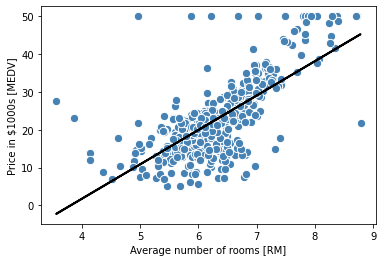

In [63]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

plt.show()

In [67]:
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('기울기: %.3f' % w[1])
print('절편: %.3f' % w[0])

기울기: 9.102
절편: -34.671


/Users/isc-yeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:369: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


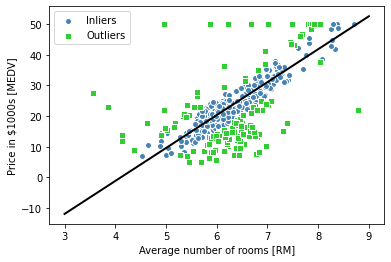

In [71]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

plt.show()

In [72]:
print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편: %.3f' % ransac.estimator_.intercept_)

기울기: 10.735
절편: -44.089


In [73]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [74]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [77]:
import numpy as np
import scipy as sp

ary = np.array(range(100000))

In [79]:
%timeit np.linalg.norm(ary)

82.2 µs ± 2.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [80]:
%timeit sp.linalg.norm(ary)

85.3 µs ± 1.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [81]:
%timeit np.sqrt(np.sum(ary**2))

74.1 µs ± 373 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


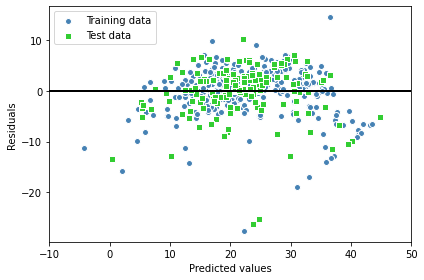

In [83]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

In [85]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 19.958, 테스트 MSE: 27.196
훈련 R^2: 0.765, 테스트 R^2: 0.673


In [86]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [87]:
print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 20.926, 테스트 MSE: 28.876
훈련 R^2: 0.753, 테스트 R^2: 0.653


In [88]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [89]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [91]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [93]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
            [:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [94]:
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

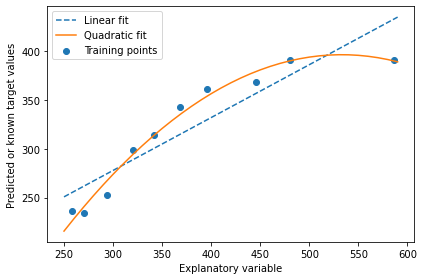

In [97]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [98]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [99]:
print('훈련 MSE 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('훈련 R^2 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

훈련 MSE 비교 - 선형 모델: 569.780, 다항 모델: 61.330
훈련 R^2 비교 - 선형 모델: 0.832, 다항 모델: 0.982


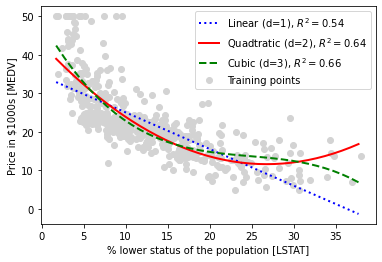

In [106]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
                        
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='Linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label='Quadtratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red',
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit,
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green',
         lw=2,
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()
                        

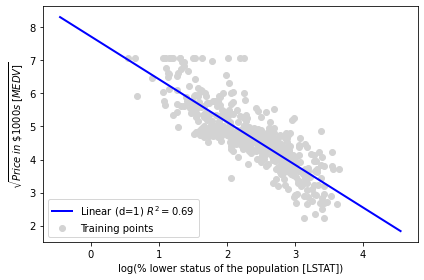

In [107]:
X = df[['LSTAT']].values
y = df['MEDV'].values

X_log = np.log(X)
y_sqrt = np.sqrt(y)

X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1) $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()